In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
from image import *
import cv2
import torch
%matplotlib inline

/home/mask/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [3]:
#set the root to the Shanghai dataset you download
root = './data/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int img_path)? (<ipython-input-6-ebc551fdcf78>, line 2)

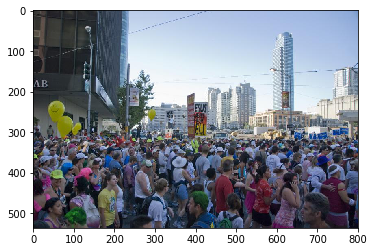

In [7]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

In [8]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

OSError: Unable to open file (unable to open file: name = './data/part_A_final/train_data/ground_truth/IMG_9.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [9]:
np.sum(groundtruth)# don't mind this slight variation

NameError: name 'groundtruth' is not defined

In [10]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [11]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [13]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

./data/part_B_final/train_data/images/IMG_9.jpg
./data/part_B_final/train_data/images/IMG_48.jpg
./data/part_B_final/train_data/images/IMG_14.jpg
./data/part_B_final/train_data/images/IMG_154.jpg
./data/part_B_final/train_data/images/IMG_357.jpg
./data/part_B_final/train_data/images/IMG_192.jpg
./data/part_B_final/train_data/images/IMG_37.jpg
./data/part_B_final/train_data/images/IMG_255.jpg
./data/part_B_final/train_data/images/IMG_218.jpg
./data/part_B_final/train_data/images/IMG_228.jpg
./data/part_B_final/train_data/images/IMG_107.jpg
./data/part_B_final/train_data/images/IMG_57.jpg
./data/part_B_final/train_data/images/IMG_155.jpg
./data/part_B_final/train_data/images/IMG_254.jpg
./data/part_B_final/train_data/images/IMG_120.jpg
./data/part_B_final/train_data/images/IMG_202.jpg
./data/part_B_final/train_data/images/IMG_198.jpg
./data/part_B_final/train_data/images/IMG_15.jpg
./data/part_B_final/train_data/images/IMG_298.jpg
./data/part_B_final/train_data/images/IMG_197.jpg
./data/

./data/part_B_final/train_data/images/IMG_141.jpg
./data/part_B_final/train_data/images/IMG_17.jpg
./data/part_B_final/train_data/images/IMG_321.jpg
./data/part_B_final/train_data/images/IMG_56.jpg
./data/part_B_final/train_data/images/IMG_365.jpg
./data/part_B_final/train_data/images/IMG_145.jpg
./data/part_B_final/train_data/images/IMG_242.jpg
./data/part_B_final/train_data/images/IMG_196.jpg
./data/part_B_final/train_data/images/IMG_337.jpg
./data/part_B_final/train_data/images/IMG_75.jpg
./data/part_B_final/train_data/images/IMG_169.jpg
./data/part_B_final/train_data/images/IMG_244.jpg
./data/part_B_final/train_data/images/IMG_160.jpg
./data/part_B_final/train_data/images/IMG_366.jpg
./data/part_B_final/train_data/images/IMG_214.jpg
./data/part_B_final/train_data/images/IMG_13.jpg
./data/part_B_final/train_data/images/IMG_188.jpg
./data/part_B_final/train_data/images/IMG_362.jpg
./data/part_B_final/train_data/images/IMG_204.jpg
./data/part_B_final/train_data/images/IMG_325.jpg
./da

./data/part_B_final/train_data/images/IMG_51.jpg
./data/part_B_final/train_data/images/IMG_89.jpg
./data/part_B_final/train_data/images/IMG_209.jpg
./data/part_B_final/train_data/images/IMG_68.jpg
./data/part_B_final/train_data/images/IMG_49.jpg
./data/part_B_final/train_data/images/IMG_276.jpg
./data/part_B_final/train_data/images/IMG_352.jpg
./data/part_B_final/train_data/images/IMG_122.jpg
./data/part_B_final/train_data/images/IMG_280.jpg
./data/part_B_final/train_data/images/IMG_167.jpg
./data/part_B_final/train_data/images/IMG_24.jpg
./data/part_B_final/train_data/images/IMG_236.jpg
./data/part_B_final/train_data/images/IMG_143.jpg
./data/part_B_final/train_data/images/IMG_78.jpg
./data/part_B_final/train_data/images/IMG_346.jpg
./data/part_B_final/train_data/images/IMG_118.jpg
./data/part_B_final/train_data/images/IMG_294.jpg
./data/part_B_final/train_data/images/IMG_384.jpg
./data/part_B_final/train_data/images/IMG_342.jpg
./data/part_B_final/train_data/images/IMG_55.jpg
./data/

./data/part_B_final/test_data/images/IMG_53.jpg
./data/part_B_final/test_data/images/IMG_83.jpg
./data/part_B_final/test_data/images/IMG_106.jpg
./data/part_B_final/test_data/images/IMG_171.jpg
./data/part_B_final/test_data/images/IMG_175.jpg
./data/part_B_final/test_data/images/IMG_28.jpg
./data/part_B_final/test_data/images/IMG_98.jpg
./data/part_B_final/test_data/images/IMG_314.jpg
./data/part_B_final/test_data/images/IMG_47.jpg
./data/part_B_final/test_data/images/IMG_186.jpg
./data/part_B_final/test_data/images/IMG_210.jpg
./data/part_B_final/test_data/images/IMG_138.jpg
./data/part_B_final/test_data/images/IMG_176.jpg
./data/part_B_final/test_data/images/IMG_60.jpg
./data/part_B_final/test_data/images/IMG_130.jpg
./data/part_B_final/test_data/images/IMG_10.jpg
./data/part_B_final/test_data/images/IMG_289.jpg
./data/part_B_final/test_data/images/IMG_215.jpg
./data/part_B_final/test_data/images/IMG_84.jpg
./data/part_B_final/test_data/images/IMG_257.jpg
./data/part_B_final/test_dat

./data/part_B_final/test_data/images/IMG_49.jpg
./data/part_B_final/test_data/images/IMG_276.jpg
./data/part_B_final/test_data/images/IMG_122.jpg
./data/part_B_final/test_data/images/IMG_280.jpg
./data/part_B_final/test_data/images/IMG_167.jpg
./data/part_B_final/test_data/images/IMG_24.jpg
./data/part_B_final/test_data/images/IMG_236.jpg
./data/part_B_final/test_data/images/IMG_143.jpg
./data/part_B_final/test_data/images/IMG_78.jpg
./data/part_B_final/test_data/images/IMG_118.jpg
./data/part_B_final/test_data/images/IMG_294.jpg
./data/part_B_final/test_data/images/IMG_55.jpg
./data/part_B_final/test_data/images/IMG_271.jpg
./data/part_B_final/test_data/images/IMG_199.jpg
./data/part_B_final/test_data/images/IMG_59.jpg
./data/part_B_final/test_data/images/IMG_8.jpg
./data/part_B_final/test_data/images/IMG_76.jpg
./data/part_B_final/test_data/images/IMG_52.jpg
./data/part_B_final/test_data/images/IMG_50.jpg
./data/part_B_final/test_data/images/IMG_109.jpg
./data/part_B_final/test_data/